<a href="https://colab.research.google.com/github/vincm1/RecSys_Implicit/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

This Notebook will conduct basic EDA for the underlying dataset supporting the development process of different RecSys algorithms.

In [1]:
import zipfile
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_zip = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/RecSys/Orders_Nov22_Jun23.zip')
df = pd.read_csv(df_zip.open('Bericht 1.csv'), delimiter=";")

<ipython-input-2-3476da07c2eb>:2: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(df_zip.open('Bericht 1.csv'), delimiter=";")


In [3]:
len(df)

2220299

In [4]:
# dropping customer name due to privacy reasons
df_2 = df[['Order Nbr', 'Entry Date', 'Entry DateTime', 'FiscalMonth',
       'BranchCustomerNbr', 'BusinessUnitLevel2', 'KDGroup',
       'Sku', 'Product Descr1', 'Product Descr2', 'ProductGroup',
       'ProductGroupMasterDescription', 'ProductGroupDescription',
       'ProductGroup2ndDescription', 'Sales', 'Qty Shipped']]

In [5]:
df_2["Order_BCN"] = df_2["Order Nbr"].astype(str) + "_" + df_2["BranchCustomerNbr"].astype(str)

In [6]:
len(df_2["Order_BCN"].unique())

843137

In [7]:
len(df_2["Order Nbr"].unique())

380175

In [8]:
duplicate_orders = df_2.groupby("Order Nbr")["BranchCustomerNbr"].nunique().sort_values(ascending=False)

In [11]:
len(duplicate_orders[duplicate_orders > 1])

93741

In [9]:
len(df_2.Sku.unique())

77401

In [24]:
unique_orders = len(df_2["Order_BCN"].unique())
unique_orders

843137

In [17]:
users = len(df_2["BranchCustomerNbr"].unique())
items = len(df_2["Sku"].unique())
combos = users * items
combos

1369765497

In [23]:
sparsity = 100 - (unique_orders / combos) * 100
sparsity

99.93844661718764

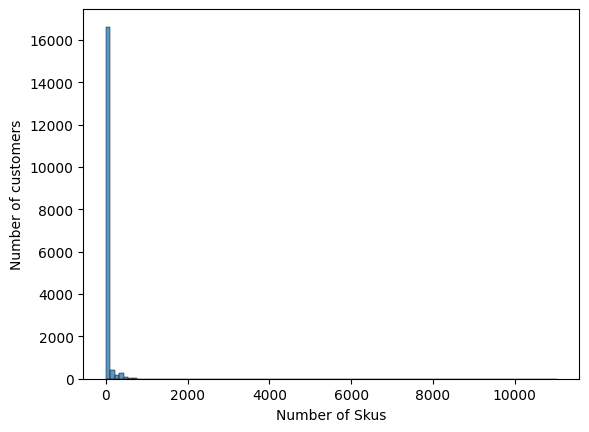

In [25]:
unique_sku_per_customer = df_2.groupby("BranchCustomerNbr")["Sku"].nunique()
unique_sku_per_customer = pd.DataFrame(unique_sku_per_customer)
sns.histplot(data=unique_sku_per_customer, x="Sku", bins=100)
plt.xlabel("Number of Skus")
plt.ylabel("Number of customers")
plt.show()

In [26]:
len(unique_sku_per_customer[unique_sku_per_customer["Sku"] >= 10]) / len(unique_sku_per_customer)

0.3218624625642764

In [27]:
unique_sku_per_customer.sort_values(by="Sku", ascending=False)

,Sku
BranchCustomerNbr,
44465054,11027
44432101,8742
44453197,6828
44465006,6046
44465057,5100
...,...
44868290,1
44868310,1
44423040,1


In [29]:
len(unique_sku_per_customer[unique_sku_per_customer["Sku"] <= 2])

6223

In [28]:
# Orders per month
df_2["Order_BCN"].nunique() / df_2["BranchCustomerNbr"].nunique() /df_2["FiscalMonth"].nunique()

5.955366728824094

In [30]:
df_2["Sku"].count() / df_2["Order_BCN"].nunique()

2.6333786798586707

In [31]:
df_2.groupby("Product Descr1")["Sku"].count().sort_values(ascending=False)

Product Descr1
AMAZON ECHO DOT BLACK             37061
ULTRA 64 GB USB FLASH DRIVE       25000
SANDISK ULTRA FIT                 22818
SANDISK ULTRA DUAL DRIVE GO-C     20570
FIRE TV STICK LITE WITH           19171
                                  ...  
KIT MEDIA DRIVE BELTS EXTENDED        1
KIT MEDIA CORE ADAPTORS FOR           1
KIT MAINT PEEL BRKT                   1
KIT MAINT BAR PIVOT                   1
ZZGL.BATT PACK F/XANTO 10.000         1
Name: Sku, Length: 50940, dtype: int64

In [32]:
df_2["purchase_freq"] = 1

In [33]:
df_2.groupby("BranchCustomerNbr")["Sku"].nunique()

BranchCustomerNbr
15413453    6
15428528    3
15430644    7
15433079    1
15445570    2
           ..
44S201B2    2
44S304B2    3
44S309B2    3
44S312B2    1
44S324B2    2
Name: Sku, Length: 17697, dtype: int64

In [34]:
df_rec = pd.DataFrame(df_2.groupby(["BranchCustomerNbr","Sku"])["purchase_freq"].sum())
df_rec

purchase_freq
BranchCustomerNbr Sku                   
15413453          1413616              1
                  CC97711              1
                  CE52895              1
                  CE52897              1
                  CE52907              1
...                                  ...
44S309B2          CE35137              1
                  CE77433              1
44S312B2          CE91064              1
44S324B2          CD07182              1
                  CF37713              1

[619188 rows x 1 columns]

In [35]:
df_2[["BranchCustomerNbr","Sku","Qty Shipped"]].head()

,BranchCustomerNbr,Sku,Qty Shipped
0,15515778,9433B9X,-1.0
1,15509465,CB31510,-1.0
2,15509465,CE63791,-1.0
3,15509465,CC36816,-1.0
4,15865338,J151410,-3.0


In [36]:
pivot_table = df_2[:10].pivot_table(values='Qty Shipped', index='BranchCustomerNbr', columns='Sku', aggfunc='sum')


In [37]:
pivot_table.fillna(0)

Sku,9433B9X,B961235,CB31510,CC36816,CE05471,CE63791,J151410,T380691,V36F167
BranchCustomerNbr,,,,,,,,,
15509465,0.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,0.0
15515778,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15865338,0.0,0.0,0.0,0.0,0.0,0.0,-3.0,0.0,0.0
15865851,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44469624,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0
44481934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0
44514514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0


# Data preprocessing

In [38]:
# converting the customerid to string
df_2["BranchCustomerNbr"] = df_2["BranchCustomerNbr"].astype(str)
# converting the skuid to string
df_2["Sku"] = df_2["Sku"].astype(str)
# Entry Date to date
df_2['Entry Date'] = pd.to_datetime(df_2['Entry Date'], format='%d.%m.%y')
# dropping retours (orders with negative Qty shipped) and zero Qty shipped orders
df_2 = df_2[df["Qty Shipped"] > 0]
# dropping backlog invoices, Specified date to filter the rows
specific_date = pd.to_datetime('2022-11-01')
# Filter the DataFrame to keep only the rows that are before or equal to the specific date
df_2 = df_2[df_2["Entry Date"] >= specific_date]
#insert purchase indication column
df_2["purchase"] = 1

In [39]:
# add column that represent sku count
def sku_count(df_pl):

  df_pl['sku_count'] = df_pl.groupby('BranchCustomerNbr')['Sku'].transform('nunique')

  return df_pl

In [40]:
df_2 = sku_count(df_2)

In [41]:
# drop users with less than one sku
df_2 = df_2[df_2.sku_count > 1]

In [43]:
len(df_2)

2025544

In [46]:
users = len(df_2.BranchCustomerNbr.unique())
items = len(df_2.Sku.unique())
combos_poss = users * items

In [55]:
combos_poss

855207360

In [49]:
purchases = len(df_2["Order_BCN"].unique())
purchases

813814

In [52]:
sparsity = 100 - ((purchases / combos_poss) * 100)
sparsity

99.90484015479007